# Proyek Sains Data - Multivariate Single-Step

<hr>

## Prediksi Harga Saham

Nama : Riskina Salsabilla Bayzura

NIM  : 220411100015

Kelas : IF5D



# DATA UNDERSTANDING

Saham adalah surat yang menjadi bukti kepemilikan sebagian modal suatu perusahaan. Saham merupakan salah satu instrumen investasi yang populer dan menjanjikan keuntungan.

Investasi saham adalah kegiatan menanamkan modal pada perusahaan dengan membeli saham. Investor saham bisa mendapatkan keuntungan dari kenaikan harga saham (capital gain) dan dividen yang dibagikan perusahaan. Namun masih banyak investor yang ragu dengan resiko berinvestasi, khawatir yang diinvestasikan tidak sesuai dengan harapan dikarenakan fluktuasi indeks harga saham dalam waktu yang singkat.

Untuk itu agar investor tidak mengalami kerugian saat membeli saham, maka diperlukan analisis terhadap saham yang ingin dibeli. Seperti dengan melakukan analisis pada saham PT Telkom Indonesia (TLKM) dan melakukan prediksi pada hari berikutnya dengan analisis teknikal.

Pada studi kasusu kali ini saya akan menggunakan 2 (dua) metode Machine Learing untuk melakukan prediksi, yaitu Regresi Linear dan salah satu jenis Neural Network, yakni Long Short Term Memory (LSTM).





## Requirement


In [1]:
# !pip install ydata-profiling
# from ydata_profiling import ProfileReport

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib

ModuleNotFoundError: No module named 'plotly'

## Load Data

In [4]:
df = pd.read_csv('/content/drive/MyDrive/PSD/Tugas3/Data_Historis_TLKM.csv')

## Deskripsi Data

Berdasarkan studi kasus saya, dataset yang akan saya gunakan merupakan data historis harga saham PT Telkom Indonesia Tbk (TLKM). Data ini berisi informasi tentang harga saham TLKM dari waktu ke waktu, termasuk harga penutupan, harga pembukaan, harga tertinggi, harga terendah, volume perdagangan, dan perubahan harga dalam persentase.Setiap baris data merepresentasikan data saham pada satu hari.

Informasi penting yang terdapat pada dataset ini adalah:

* Harga: Informasi harga saham dicatat dalam beberapa aspek yaitu harga terakhir, harga pembukaan, harga tertinggi, dan harga terendah dalam satu hari. Informasi ini menunjukkan fluktuasi harga saham TLKM dalam periode waktu tersebut.
* Volume Perdagangan: Fitur 'Vol.' menunjukkan jumlah saham TLKM yang diperdagangkan pada hari itu. Volume perdagangan yang tinggi bisa mengindikasikan adanya aktivitas jual-beli yang aktif.
* Perubahan Harga: Fitur 'Perubahan %' memberikan gambaran tentang persentase perubahan harga saham TLKM pada hari itu dibandingkan dengan hari sebelumnya. Nilainya bisa positif (menunjukkan kenaikan harga) atau negatif (menunjukkan penurunan harga).
* Tanggal: Data ini menunjukkan kapan informasi harga saham tersebut direkam. Dengan informasi tanggal, saya dapat melakukan analisis berdasarkan waktu seperti tren pergerakan harga dalam periode tertentu.

**Tujuan**:

Tujuan saya menggunakan dataset ini adalah untuk melakukan prediksi harga saham TLKM di masa mendatang dengan menggunakan metode Machine Learning seperti Regresi Linear dan Long Short-Term Memory (LSTM). Dengan mempelajari pola historis dari data ini, model machine learning dapat dilatih untuk memperkirakan harga saham di hari berikutnya.

**Tantangan**:

Salah satu tantangan dalam mengolah dataset ini adalah tipe data pada fitur 'Vol.' dan 'Perubahan %' yang masih berupa 'object' dan perlu diubah ke tipe data numerik (float) sebelum digunakan untuk membuat model.

**Kesimpulan**:

Dataset ini memberikan informasi yang cukup lengkap tentang pergerakan harga saham TLKM. Dengan melakukan analisis dan pemrosesan data yang tepat, dataset ini dapat digunakan untuk membangun model prediksi harga saham yang akurat.

## Penjelasan Fitur


Dari dataset yang kami miliki terdapat beberapa attribut sebagai berikut:


1.   **Tanggal**:
      Data ini berisi tanggal saham dengan format Tanggal-Bulan-Tahun. Data ini memiliki tanggal minimum 01 Januari 2019 dan tanggal maksimum 29 September 2024. Tipe datanya adalah datetime (Nominal).


2.   **Terakhir**: Menunjukkan harga penutupan saham pada hari tersebut. Tipe datanya adalah float64 (Numerik).


3.   **Pembukaan**: Menunjukkan harga pembukaan saham pada hari tersebut. Tipe datanya adalah float64 (Numerik).


4.   **Tinggi**: Menunjukkan harga saham tertinggi yang dicapai pada hari tersebut. Tipe datanya adalah float64 (Numerik).


5.   **Rendah**: Menunjukkan harga terendah saham yang dicapai pada hari tersebut. Tipe datanya adalah float64 (Numerik).


6.   **Vol. (Volume)**: Menunjukkan volume perdagangan saham pada hari tersebut, yaitu jumlah saham yang diperdagangkan. Tipe datanya adalah obyek karena mengandung karakter non-numerik.


7.   **Perubahan %** : Menunjukkan persentase perubahan harga saham pada hari tersebut dibandingkan dengan hari sebelumnya. Tipe datanya adalah obyek karena mengandung karakter non-numerik.





## EDA

In [5]:
print(f"shape: {df.shape}")
print(f"count of rows with missing values: {len(df[df.isna().any(axis=1)])}") # 0
print(f"columns: {df.columns}")

shape: (1390, 7)
count of rows with missing values: 5
columns: Index(['Tanggal', 'Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah', 'Vol.',
       'Perubahan%'],
      dtype='object')


Dari informasi di atas kita mendapatkan informasi mengenai beberapa hal, antara lain:

1. df.shape => menampilkan jumlah kolom dan baris dari dataset, terdapat **1390** baris dan **7** kolom.
2. Terdapat missing values sebanyak **5**
3. Isi kolomnya antara lain => Tanggal, Terakhir, Pembukaan, Tertinggi, Terendah, Vol., Perubahan%

### Exploratory Data Analysis (EDA) secara cepat menggunakan perpustakaan Pandas Profiling

In [6]:
# profile = ProfileReport(df, title=f"Train dataset")
# profile.to_notebook_iframe()

### Mengecek Beberapa Baris Pertama Dataset

In [7]:
df.head()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,02/01/2019,3.73,3.75,3.76,3.70,"31,36M","-0,53%"
1,03/01/2019,3.74,3.71,3.77,3.69,"83,84M","0,27%"
2,04/01/2019,3.71,3.69,3.74,3.69,"73,94M","-0,80%"
3,07/01/2019,3.77,3.76,3.79,3.75,"83,68M","1,62%"
4,08/01/2019,3.80,3.77,3.80,3.75,"67,96M","0,80%"


df.head di atas menampilkan 5 data yang berada pada indeks atas, terdapat beberapa hal yang perlu dilakukan perubahan, antara lain:
1. Kolom Tanggal

    Perlu dilakukan perubahan format tanggal, agar dapat dibaca mesin dengan mudah.

2. Kolom Vol.

    Perubahan nama kolom dari Vol. menjadi Volume agar mudah mengidentifikasi nama kolomnya, selain itu format dari isi kolomnya masih terdapat string ('M') yang mana perlu dilakukan perubahan menjadi 0 sesuai data awalnya, ('M' = 1.000.000.000).

3. Kolom Perubahan

    Kemungkinan besar kita tidak akan menggunakan kolom ini, sehingga nantinya akan kita hapus, sebelum itu akan kita cek korelasinya dengan fitur lain agar mengetahui keterkaitannya dengan fitur lain, sehingga apabila kita hapus tidak akan berdampak dengan fitur lainnya.

### Mengecek Format Kolom

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1390 entries, 0 to 1389
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tanggal     1390 non-null   object 
 1   Terakhir    1390 non-null   float64
 2   Pembukaan   1390 non-null   float64
 3   Tertinggi   1390 non-null   float64
 4   Terendah    1390 non-null   float64
 5   Vol.        1385 non-null   object 
 6   Perubahan%  1390 non-null   object 
dtypes: float64(4), object(3)
memory usage: 76.1+ KB


Dari hasil di atas kita dapat melihat bahwa Kolom Vol. jumlahnya hanya **1385** data dibanding yang lainnya yaitu **1390** yang berarti terdapat 5 data yang hilang. Selain itu, datatypenya masih berupa object yang seharusnya adalah float64 karena nantinya akan dilakukan perhitungan untuk Kolom Vol.

### Mengganti Nama Kolom

In [9]:
df = df.rename(columns={'Terakhir': 'Penutupan', 'Vol.':'Volume', 'Perubahan%': 'Perubahan'})

Disini saya mengganti nama-nama kolom, untuk memudahkan pemanggilan nama tiap kolom guna dilakukannya perhitungan nantinya.

### Menghitung Jumlah Data yang Hilang (Missing Value)

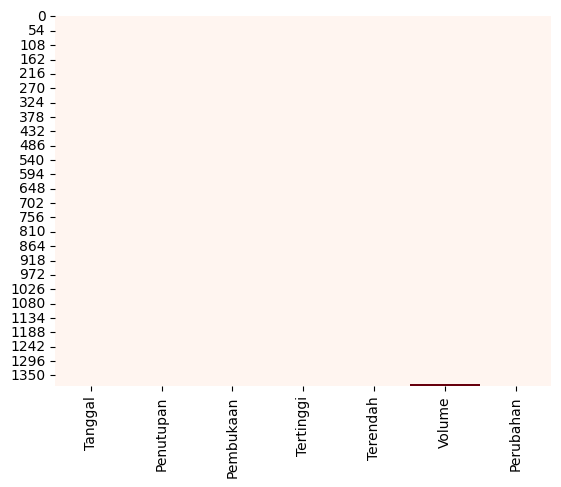

In [10]:
sns.heatmap(df.isnull(),cmap = 'Reds',cbar = False);

In [11]:
df.isnull().sum()

,0
Tanggal,0
Penutupan,0
Pembukaan,0
Tertinggi,0
Terendah,0
Volume,5
Perubahan,0


Setelah kita cek, memang benar bahwa Kolom Vol. memiliki missing values sejumlah **5 data**. Missing value akan diperbaiki saat memasuki data preprocessing.

### Statistik Deskriptif

In [12]:
df.describe()

,Penutupan,Pembukaan,Tertinggi,Terendah
count,1390.000000,1390.000000,1390.000000,1390.000000
mean,3.721345,3.723511,3.763662,3.680288
std,0.490229,0.488343,0.487201,0.488153
min,2.560000,2.550000,2.590000,2.450000
25%,3.310000,3.302500,3.360000,3.260000
50%,3.800000,3.800000,3.840000,3.770000
75%,4.080000,4.070000,4.120000,4.030000
max,4.770000,4.850000,4.850000,4.720000


Tabel di atas menunjukkan statistik deskriptif untuk masing-masing kolom, antara lain: Penutupan, Pembukaan, Tertinggi, Terendah. Untuk kolom Volume dan Perubahan tidak diikut sertakan pada code ini karena dua kolom tersebut masih berupa object dan bukan float.

### Mengkonversi Tanggal

In [13]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'], dayfirst=True)

df['Tanggal']

,Tanggal
0,2019-01-02
1,2019-01-03
2,2019-01-04
3,2019-01-07
4,2019-01-08
...,...
1385,2024-09-18
1386,2024-09-19
1387,2024-09-20
1388,2024-09-23


Dilakukan konversi tanggal untuk mengubah formatnya menjadi 'dd-mm-yyyy' agar memudahkan kita untuk mengambil informasinya.

### Mengekstrak Tahun Dari Kolom Tanggal

In [14]:
df['Tahun'] = df['Tanggal'].dt.year

df['Tahun']

,Tahun
0,2019
1,2019
2,2019
3,2019
4,2019
...,...
1385,2024
1386,2024
1387,2024
1388,2024


Disini saya ambil data untuk tahun saja, agar nanti dapat kita buat visualisasi persebaran datanya, tahun ini nantinya akan dijadikan salah satu sumbunya.

### Visualisasi Jumlah Data Berdasarkan Tahun

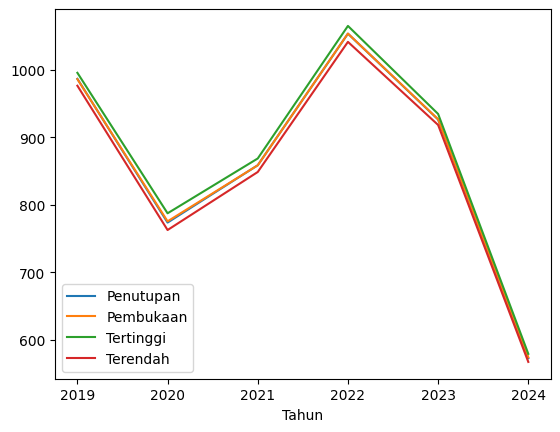

In [15]:
df_group_tahun = df.groupby('Tahun').sum(numeric_only=True)
df_numerik = df_group_tahun.select_dtypes(include='number')

df_numerik.plot()
plt.show()

Diagram di atas merupakan visualisasi dari banyaknya data berdasarkan tahun yang tersedia, dapat dilihat bahwa jumlah data tiap fiturnya pada awal tahun 2019 menuju tahun 2020 mengalami penurunan yang signifikan, kemudian pada awal tahun 2020 hingga tahun 2022 mengalami kenaikan yang cukup stabil, dan berlanjut pada awal tahun 2023 mengalami penurunan yang cukup drastis.

### Visualisasi Rata-Rata Data Berdasarkan Tahun

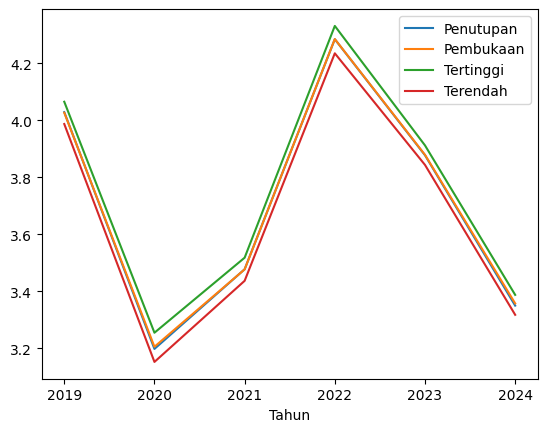

In [16]:
df_group_tahun = df.groupby('Tahun').mean(numeric_only=True)
df_numerik = df_group_tahun.select_dtypes(include='number')

df_numerik.plot()
plt.show()

Diagram tersebut memvisualisasikan rata-rata nilai dari fitur-fitur numerik (Penutupan, Pembukaan, Tertinggi, Terendah) pada dataset harga saham PT Telkom Indonesia Tbk (TLKM) untuk setiap tahunnya.

### Visualisasi Jumlah Volume Untuk Tiap Tahunnya

### Proses Konvert Kolom Vol. Menjadi Float



In [17]:
def convert_vol_to_float(vol):
  if isinstance(vol, (int, float)):
    return vol

  vol = vol.replace(',', '.')

  if 'M' in vol:
    return float(vol.replace('M', '')) * 1_000_000
  elif 'K' in vol:
    return float(vol.replace('K', '')) * 1_000
  elif 'B' in vol:
    return float(vol.replace('B', '')) * 1_000_000_000
  else:
    try:
      return float(vol)
    except ValueError:
      return vol

In [18]:
df['Volume'] = df['Volume'].apply(convert_vol_to_float)

Tujuan dari kode ini adalah untuk mengubah tipe data kolom 'Vol.' dari object menjadi float. Hal ini perlu dilakukan karena kolom 'Vol.' berisi informasi volume perdagangan saham yang penting untuk analisis dan pemodelan, tetapi masih mengandung karakter non-numerik (seperti "M" untuk juta dan "K" untuk ribu). Dengan mengubahnya menjadi float, kita dapat melakukan perhitungan matematika dan menggunakannya dalam algoritma machine learning.

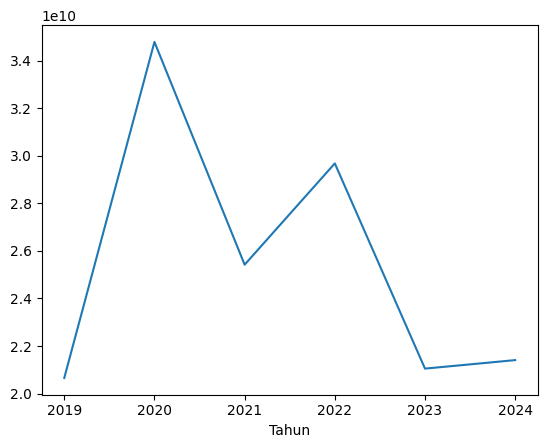

In [19]:
df_group_tahun = df.groupby('Tahun').sum(numeric_only=True)
df_group_tahun['Volume'].plot()

plt.show()

Visualisasi jumlah volume untuk tiap tahunnya, kolom volumen ini saya bedakan dikarenakan untuk memastikan bahwa setiap kolom diproses dengan benar sesuai dengan tipe data dan karakteristiknya, sehingga perhitungan dapat dilakukan dengan akurat dan menghindari error.

### Korelasi Koefisien


Sebelum melakukan visualisasi korelasi antar sesama fitur, perlu dilakukan kovert kolom perubahan yang tipe data awalnya adalah string dikarenakan terdapat '%' pada datanya lalu saya ubah menjadi float agar tidak terjadi error nantinya.

In [20]:
df['Perubahan'] = df['Perubahan'].str.replace(',', '.').str.rstrip('%').astype(float) / 100

df['Perubahan']

,Perubahan
0,-0.0053
1,0.0027
2,-0.0080
3,0.0162
4,0.0080
...,...
1385,0.0097
1386,0.0064
1387,0.0032
1388,0.0063


Di atas merupakan hasil dari konvert yang telah saya lakukan yaitu dengan menghilangkan symbol '%' namun tidak mengubah inti dari isi datanya.

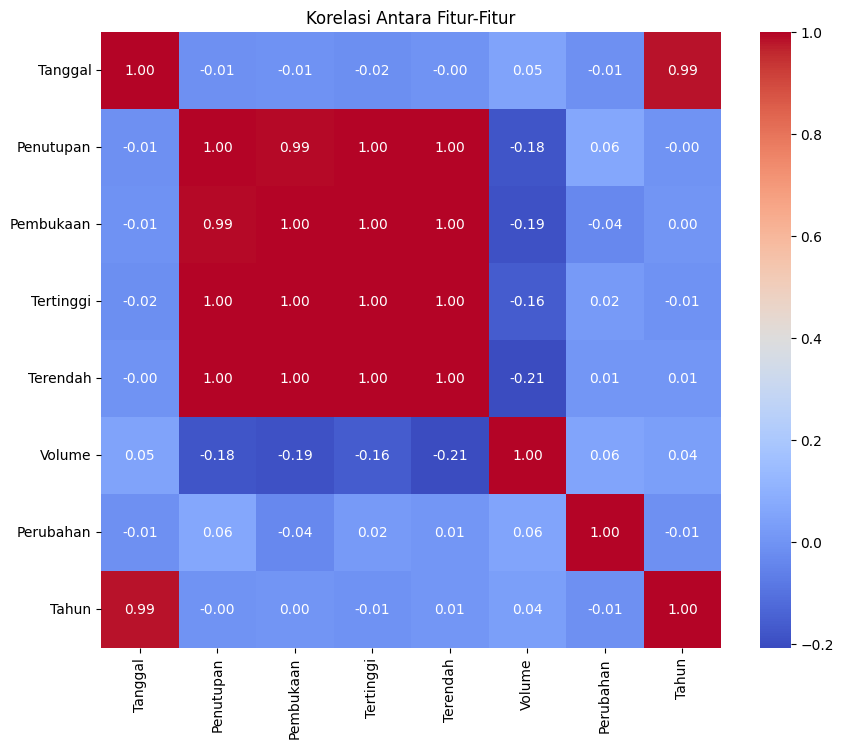

In [21]:
# Menghitung matriks korelasi
correlation_matrix = df.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))  # Mengatur ukuran gambar
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antara Fitur-Fitur')
plt.show()

Dari hasil visualisasi korelasi fitur-fitur di atas, saya mendapatkan kesimpulan antara lain:

1. Korelasi Positif Kuat: Terdapat korelasi positif yang kuat antara fitur-fiturnya, yaitu 'Penutupan', 'Pembukaan', 'Tertinggi', dan 'Terendah'. Hal ini menunjukkan bahwa ketika salah satu fitur harga naik, fitur harga lainnya cenderung naik juga. Korelasi yang kuat ini logis karena fitur-fitur ini saling terkait dalam pergerakan harga saham harian.

2. Korelasi Lemah: 'Volume' dan 'Perubahan' memiliki korelasi yang relatif lemah dengan fitur-fitur lainnya. Artinya, perubahan volume perdagangan atau persentase perubahan harga tidak memiliki pengaruh yang signifikan terhadap harga saham secara langsung.

3. Korelasi Negatif: 'Tahun' menunjukkan korelasi negatif yang lemah dengan beberapa fitur. Ini bisa menunjukkan adanya tren penurunan harga saham dalam rentang waktu yang diwakili oleh data (2019-2024), meskipun korelasinya tidak terlalu kuat.

Secara umum, visualisasi korelasi menunjukkan bahwa fitur-fitur (Penutupan, Pembukaan, Tertinggi, Terendah) memiliki hubungan yang erat, sedangkan Volume dan Perubahan memiliki hubungan yang lebih independen dengan fitur-fitur lainnya. Oleh karena itu, pada proses selanjutnya akan dilakukan penghapusan Kolom Perubahan dan Kolom Volume karena tidak akan terlalu berguna.

Pearson correlation is a statistical measure used to determine the strength and direction of a linear relationship between two continuous variables. The value of the Pearson correlation coefficient (denoted as **r**) ranges from -1 to 1:

- **r = 1**: Perfect positive linear relationship. As one variable increases, the other increases proportionally.
- **r = -1**: Perfect negative linear relationship. As one variable increases, the other decreases proportionally.
- **r = 0**: No linear relationship between the two variables.

The formula for Pearson correlation is:

$
r = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum (X_i - \bar{X})^2 \sum (Y_i - \bar{Y})^2}}
$

Where:
- \(X_i\) and \(Y_i\) are individual data points from the two variables.
- \(\bar{X}\) and \(\bar{Y}\) are the means of the variables \(X\) and \(Y\), respectively.

Would you like to calculate the Pearson correlation for a specific dataset, or do you need further explanation on its interpretation?

# Data Preprocessing

## Imputasi Missing Value

### Menampilkan baris data yang memiliki missing value

In [23]:
missing_data = df[df.isna().any(axis=1)]

missing_data

,Tanggal,Penutupan,Pembukaan,Tertinggi,Terendah,Volume,Perubahan,Tahun
1384,2024-09-17,3.09,3.12,3.13,3.08,NaN,-0.0064,2024
1385,2024-09-18,3.12,3.12,3.13,3.10,NaN,0.0097,2024
1386,2024-09-19,3.14,3.14,3.15,3.12,NaN,0.0064,2024
1387,2024-09-20,3.15,3.15,3.17,3.12,NaN,0.0032,2024
1388,2024-09-23,3.17,3.15,3.18,3.13,NaN,0.0063,2024


Dapat dilihat bahwa pada index 1384-1388 pada kolom Vol. terdapat 5 data yang berstatus 'NaN'.

### Menampilkan kolom yang memiliki missing value

In [24]:
missing_columns = df.columns[df.isna().any()].tolist()

missing_columns

['Volume']

Kita pastikan kolom mana yang memeiliki missing values, dan hasilnya adalah Kolom Vol. saja yang terdapat missing value.

###  Menampilkan total missing value per kolom

In [25]:
missing_count = df.isna().sum()

missing_count

,0
Tanggal,0
Penutupan,0
Pembukaan,0
Tertinggi,0
Terendah,0
Volume,5
Perubahan,0
Tahun,0


Total missing values pada Kolom Vol. berjumlah 5 data.

### Menampilkan persentase missing value per kolom

In [26]:
missing_percentage = df.isna().mean() * 100

missing_percentage

,0
Tanggal,0.000000
Penutupan,0.000000
Pembukaan,0.000000
Tertinggi,0.000000
Terendah,0.000000
Volume,0.359712
Perubahan,0.000000
Tahun,0.000000


Presentasi missing values pada Kolom Vol. hanya sebesar **0.359712**, sehingga saya memutuskan untuk menangani missing values dengan menggunakan *Litwise Deletion* yaitu metode dalam statistik untuk menangani data yang hilang dengan cara menghapus seluruh catatan yang mengandung nilai yang hilang. Sehingga saya akan **menghapus data pada index 1384-1388**.

### Menghapus baris yang memiliki missing value

In [27]:
df.dropna(subset=['Volume'],how='any',inplace=True)
df['Volume'].isnull().sum()

df['Volume']

,Volume
0,31360000.0
1,83840000.0
2,73940000.0
3,83680000.0
4,67960000.0
...,...
1380,46440000.0
1381,62900000.0
1382,85790000.0
1383,125030000.0


In [28]:
missing_count = df.isna().sum()

missing_count

,0
Tanggal,0
Penutupan,0
Pembukaan,0
Tertinggi,0
Terendah,0
Volume,0
Perubahan,0
Tahun,0


## Cek Data yang ganda

In [29]:
duplicated_count = df.duplicated().sum()

duplicated_count

0

## Definisi Kolom

In [30]:
#X sebagai features, i.e. data selain tanggal dan harga penutupan saham...
X = df.drop(columns = ['Tanggal','Penutupan','Tahun'])
#...dan Y sebagai target, i.e. harga penutupan saham
Y = df['Penutupan']

In [31]:
X

,Pembukaan,Tertinggi,Terendah,Volume,Perubahan
0,3.75,3.76,3.70,31360000.0,-0.0053
1,3.71,3.77,3.69,83840000.0,0.0027
2,3.69,3.74,3.69,73940000.0,-0.0080
3,3.76,3.79,3.75,83680000.0,0.0162
4,3.77,3.80,3.75,67960000.0,0.0080
...,...,...,...,...,...
1380,3.06,3.06,3.02,46440000.0,0.0000
1381,3.03,3.05,3.02,62900000.0,0.0033
1382,3.06,3.07,3.05,85790000.0,0.0033
1383,3.08,3.12,3.07,125030000.0,0.0197


In [32]:
Y

,Penutupan
0,3.73
1,3.74
2,3.71
3,3.77
4,3.80
...,...
1380,3.03
1381,3.04
1382,3.05
1383,3.11


## Splitting Dataset

In [33]:
##membagi data untuk training dan testing, proporsi data testing = 0.2*total data, data tidak dikocok
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, shuffle=False)

In [34]:
print('Train:', X_train.shape, Y_train.shape)
print('Test:', X_test.shape, Y_test.shape)

Train: (1108, 5) (1108,)
Test: (277, 5) (277,)


## Scale Fitur Data

In [35]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [36]:
# Data Before
list(X_train.Pembukaan.head())

[3.75, 3.71, 3.69, 3.76, 3.77]

In [37]:
# Data After
print(list(X_train_scale[:5, 0]))

[0.5217391304347827, 0.5043478260869567, 0.4956521739130435, 0.5260869565217392, 0.5304347826086957]


# Modeling

## Menggunakan Regresi Linear

In [38]:
#define sklearn.linear_model.LinearRegression sebagai Lr
Lr = LinearRegression()
#training model
Lr.fit(X_train_scale, Y_train)

LinearRegression()

In [39]:
pred = Lr.predict(X_test_scale)

In [40]:
print('Hasil Akurasi Pelatihan Dengan Linear Regression Terhadap Test Data')
print(f"Nilai MSE : {mean_squared_error(pred,Y_test)}")
print(f"Nilai MAE : {mean_absolute_error(pred,Y_test)}")
print(f"Nilai R2  : {r2_score(pred,Y_test)}")

Hasil Akurasi Pelatihan Dengan Linear Regression Terhadap Test Data
Nilai MSE : 0.00030681876069581183
Nilai MAE : 0.012942068974154442
Nilai R2  : 0.9982077284703859


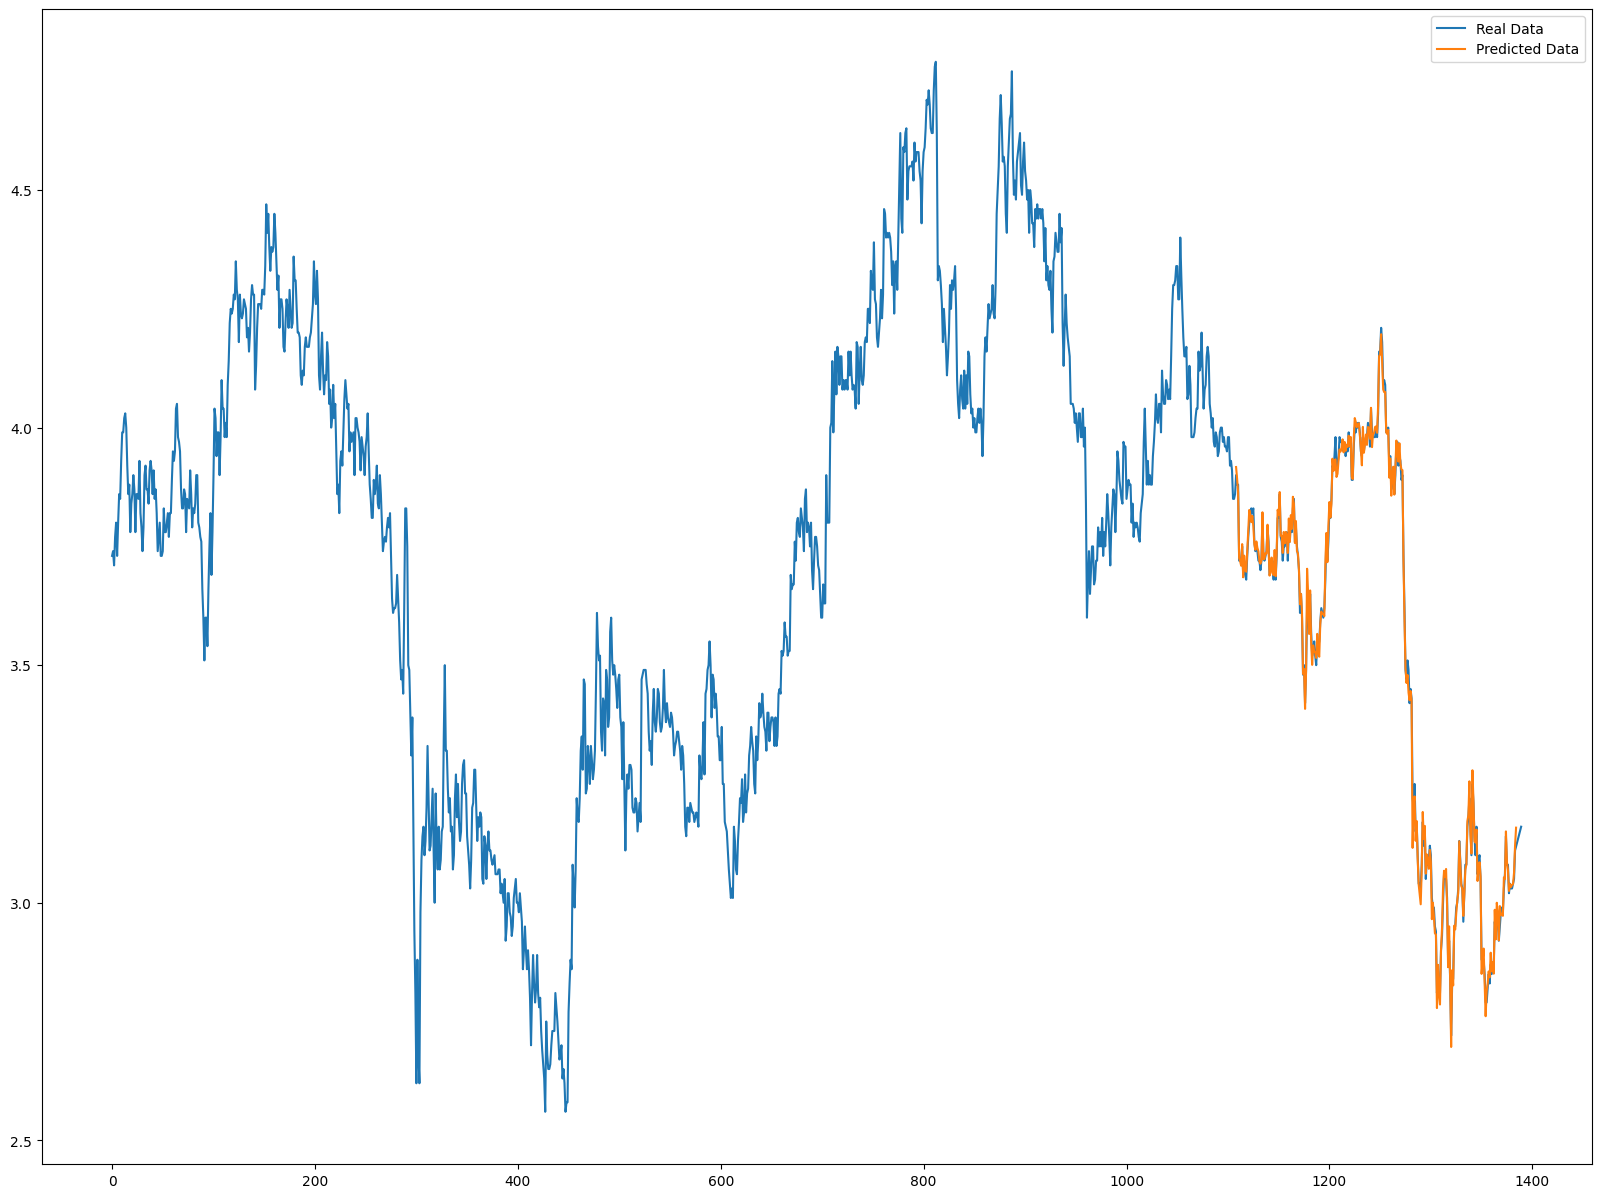

In [41]:
#plotting
plt.figure(figsize=(20,15))
plt.plot(Y)
plt.plot(np.arange(len(Y_train),len(Y)),pred)
plt.legend(['Real Data','Predicted Data'])
plt.show()

In [44]:
model_url = '/content/drive/MyDrive/PSD/model/lr-single-multivariate.joblib'
joblib.dump(Lr, model_url)

['/content/drive/MyDrive/PSD/model/lr-single-multivariate.joblib']